In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/Users/sanjaybharath/Downloads/movies.csv')

In [7]:
# Now let's take a look at the data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_cor
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980-06-13
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980-07-02
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980-06-20
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980-07-02
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980-07-25


In [80]:
#check for missing values

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(missing * 100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [81]:
#check datatypes
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [29]:
#changing datatype of columns

#df['budget'] = df['budget'].astype('int64')
#df['gross'] = df['gross'].astype('int64')

The budget - 28% ,gross - 2% have missing values hence it cant be converted to integer
sol: it is better to either fill the missing values with 0 or dropping the missing values.
https://linuxhint.com/fix-cannot-convert-non-finite-values-na-or-inf-integer/
    

In [30]:
#the year and released columns are same so we are creating a new column with only year from released column

#df['released'].astype(str)


In [4]:
df['year_cor'] = pd.to_datetime(df['released'].str.split(' \(').str[0])


In [41]:
df['year_cor']

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7663   2020-10-23
7664   2020-02-07
7665   2020-04-27
7666   2020-10-01
7667   2020-08-19
Name: year_cor, Length: 7668, dtype: datetime64[ns]

In [33]:
print(df.dtypes)


name                object
rating              object
genre               object
year                 int64
released            object
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
year_cor    datetime64[ns]
dtype: object


In [35]:
#df['year_cor'].year
#ttributeError: 'Series' object has no attribute 'year'

In [83]:
#We can also extract the year from the Pandas Datetime column, using the DatetimeIndex.year attribute. 
#Note that this method takes a date as an argument.
df['year_cor'] = pd.DatetimeIndex(df['year_cor']).year


In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_cor
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


In [54]:
#print(df.dtypes)

In [55]:
#df['yearrr'] = df['yearrr'].astype('int64')

In [56]:

#for col in df.columns:
    #missing = np.mean(df[col].isnull())
    #print('{} - {}%'.format(col,round(missing * 100)))

In [86]:
#df.sort_values(by = ['gross'],inplace = False , ascending = False)

In [59]:
#display max rows
pd.set_option('display.max_rows',None)


In [8]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_cor
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980-06-13
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980-07-02
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980-06-20
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980-07-02
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980-07-25


In [65]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

#guessing : budget,company may have high correlation

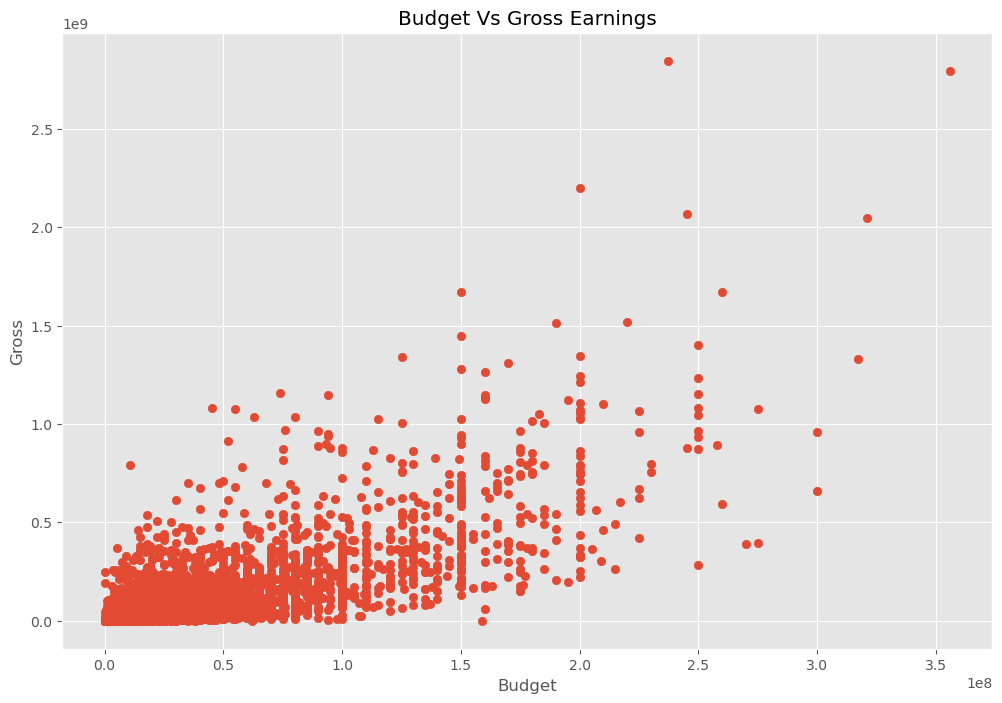

In [88]:
#scatterplot between budget and gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [90]:
#df.head()

<Axes: xlabel='budget', ylabel='gross'>

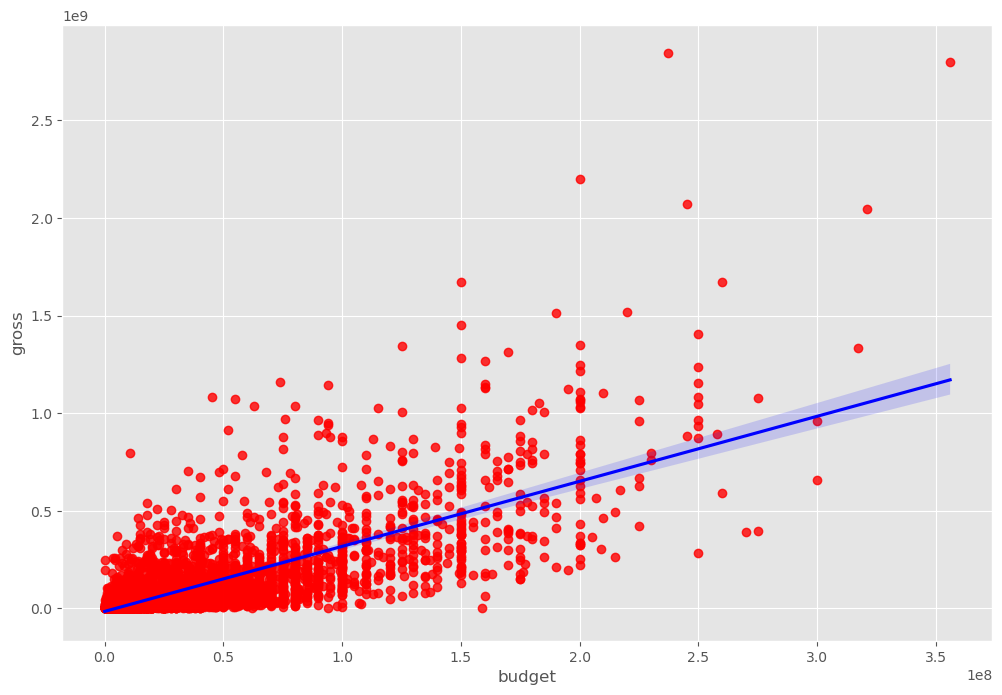

In [91]:
sns.regplot(x = 'budget' , y='gross',data=df,scatter_kws={"color" : "red"},line_kws={"color" : "blue"})

#correlation between variables
#pearson,kendall,spearman

In [92]:
df.corr()

/var/folders/p7/_034368x7tn2lp789fzhlh8c0000gn/T/ipykernel_50020/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime,year_cor
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.997415
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636
year_cor,0.997415,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000


In [93]:
df.corr(method='pearson')

/var/folders/p7/_034368x7tn2lp789fzhlh8c0000gn/T/ipykernel_50020/1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime,year_cor
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.997415
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636
year_cor,0.997415,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000


In [94]:
df.corr(method='kendall')

/var/folders/p7/_034368x7tn2lp789fzhlh8c0000gn/T/ipykernel_50020/1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,year,score,votes,budget,gross,runtime,year_cor
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184,0.987642
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611,0.073436
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240,0.325814
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483,0.216871
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933,0.190789
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000,0.096999
year_cor,0.987642,0.073436,0.325814,0.216871,0.190789,0.096999,1.000000


In [95]:
df.corr(method='spearman')

/var/folders/p7/_034368x7tn2lp789fzhlh8c0000gn/T/ipykernel_50020/1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,year,score,votes,budget,gross,runtime,year_cor
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977,0.997407
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857,0.107602
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159,0.462767
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370,0.306901
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243,0.278701
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000,0.142915
year_cor,0.997407,0.107602,0.462767,0.306901,0.278701,0.142915,1.000000


/var/folders/p7/_034368x7tn2lp789fzhlh8c0000gn/T/ipykernel_50020/310660330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl_matrix=df.corr(method='pearson')


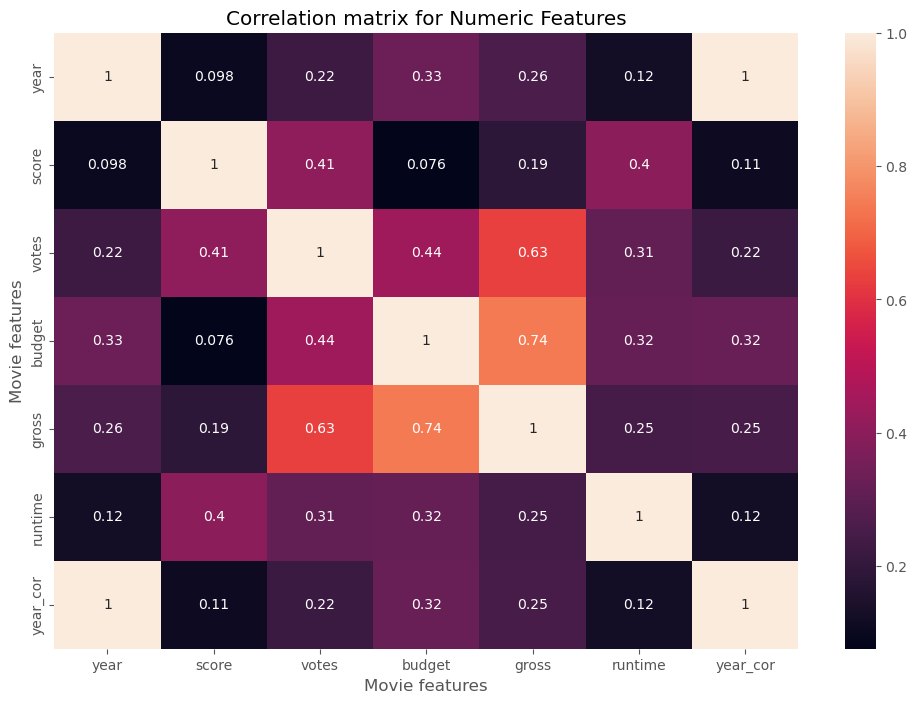

In [96]:
correl_matrix=df.corr(method='pearson')

sns.heatmap(correl_matrix,annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [97]:
#df


In [6]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_cor
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980-06-13
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980-07-02
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980-06-20
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980-07-02
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980-07-25


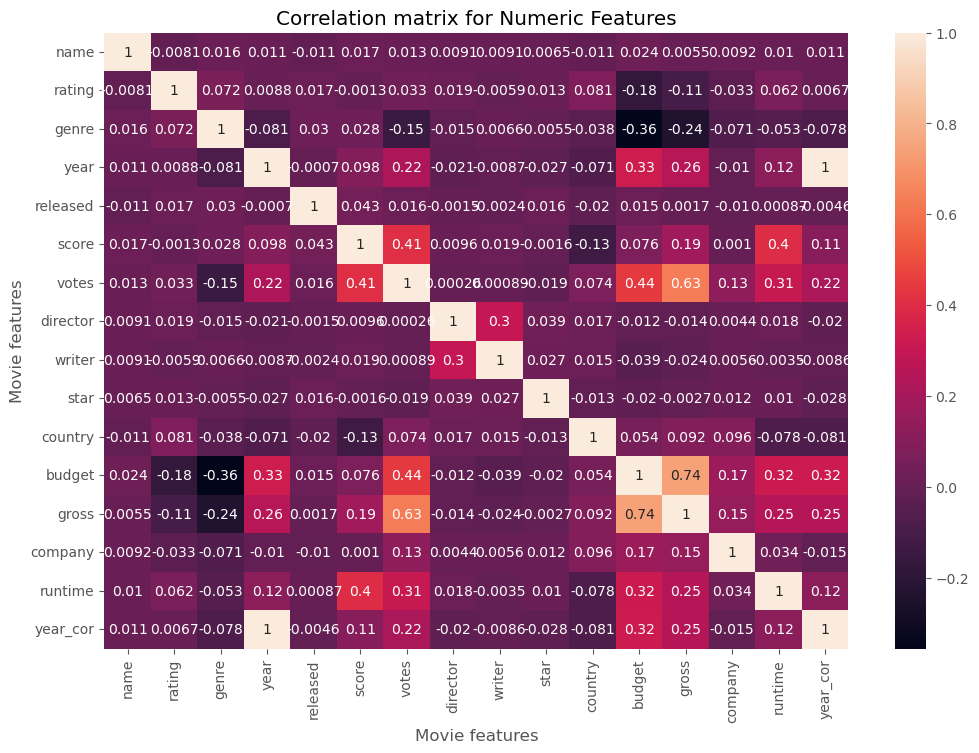

In [99]:
correl_matrix=df_numerized.corr(method='pearson')

sns.heatmap(correl_matrix,annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [100]:
correl_matrix=df_numerized.corr()
correl_pairs = correl_matrix.unstack()
correl_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
          year_cor    0.010699
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
          year_cor    0.006741
genre   

In [101]:
sorted_pairs = correl_pairs.sort_values(kind="quicksort")
sorted_pairs

genre     budget     -0.356564
budget    genre      -0.356564
genre     gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
votes     genre      -0.145307
genre     votes      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
year_cor  country    -0.080844
country   year_cor   -0.080844
          runtime    -0.078412
runtime   country    -0.078412
genre     year_cor   -0.077911
year_cor  genre      -0.077911
genre     company    -0.071067
company   genre      -0.071067
year      country    -0.070938
country   year       -0.070938
genre     runtime    -0.052711
runtime   genre      -0.052711
budget    writer     -0.039451
writer    budget     -0.039451
genre     country    -0.037615
country   genre      -0.037615
rating    company    -0.032943
company   rating     -0.032943
year_cor

In [102]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes     gross       0.630757
gross     votes       0.630757
          budget      0.740395
budget    gross       0.740395
year      year_cor    0.997415
year_cor  year        0.997415
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
year_cor  year_cor    1.000000
dtype: float64


In [ ]:
#conclusion : Votes and Budget have high correlation with Gross Earnings
              #Company have low correlation